#Introduction

The dataset contains health and demographic data from the years 2014-2015, sourced from the Global Health Observatory Data Repository. This exploratory data analysis (EDA) aims to investigate various aspects of the data, including missing values, data cleaning and processing, analysis of demographic trends such as age distribution, fertility rates, literacy rates, and life expectancy across different regions and countries. The analysis will provide insights into the relationships between these variables and their implications for public health and policy.

#Data cleaning and processing

Firstly, let us load the dataset into a pandas DataFrame and identify any missing values in the dataset:



In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Raw data

In [ ]:
dataset = pd.read_csv('/data.csv')
dataset.head()

#Missing values

Lets us now identify the missing values in the data set.


In [ ]:
missing_values = dataset.isnull().sum()
print(missing_values)

#Addressing the missing values( choosing a method)

Next, we'll address any missing values in the dataset. Since the dataset contains health and demographic data spanning different regions and countries, it's important to handle missing values appropriately. Instead of simply replacing missing values with a metric calculated for the whole column, we'll adopt a better approach that takes into account regional differences. This may involve imputation techniques such as mean or median imputation within each region.

Additionally, we'll check for any other problems with the data, such as inconsistencies or outliers, and fix them accordingly.
I chose the imputation method of the mean and median because we are working with numerical values and I can use the available values to find an estimate value of the values that are missing.

#Addressing the 'Fertility rate':

We will be addressing the missing values using the mean as a method of choice. We will be using the fertility rate's mean of the existing values to calculate appropiate estimates of the missing values to fill the data set with.

In [ ]:

dataset['FertilityRate']= dataset['FertilityRate'].replace(np.NaN,dataset['FertilityRate'].mean())
print(dataset['FertilityRate'])


#Addressing the 'Literacy rate':

We will be addressing the missing values using the mean as a method of choice. We will be using the literacy rate's mean of the existing values to calculate appropiate estimates of the missing values to fill the data set with.

In [ ]:

dataset['LiteracyRate'] = dataset['LiteracyRate'].replace(np.NaN,dataset['LiteracyRate'].mean())
print(dataset['LiteracyRate'])

#Addressing the 'GNI':

We will be addressing the missing values using the mean as a method of choice. We will be using the GNI's mean of the existing values to calculate appropiate estimates of the missing values to fill the data set with.

In [ ]:

dataset['GNI'] = dataset['GNI'].replace(np.NaN,dataset['GNI'].mean())
print(dataset['GNI'])

# Final version of the dataframe
This is the final version of the dataframe. Only data which is relevant to the topics and questions to be answered in this report were addressed .


In [ ]:

missing_values1 = dataset.isnull().sum()
print(missing_values1)

In [ ]:

health_and_demographics_df = dataset
health_and_demographics_df.head()

# Analysis

Now that the data has been cleaned and processed, we can proceed with the analysis. We will find out about the following:

1. Country with the lowest and highest population under 15
2. Region with the highest population over 60
3. The fertility rate vs income graph
4. List of Regions names in ascending order: Literacy rates
5. List of Regions in ascending order: Low child mortality Rate
6. Box and whisker plot for the life expectancy across different regions
7. Graphs of life expectancys relation to wealth across different
   regions and wealths relation to fertility across different regions.
8. graphs: literacy vs. life expectancy by region, African countries.
   *What can be concluded from the graphs?
   *How confident can we be in the relationships represented here?


# Country with the lowest and highest population under 15

Accordind to the analysis:

The country with the lowest population under 15 is Japan, with a population of 13.12

The country with the highest population under 15 is Niger, with a population of 49.99

In [ ]:



under_fifteen= np.array(health_and_demographics_df['Under15'])
country_array= np.array(health_and_demographics_df['Country'])


minimum_percentage =min(under_fifteen)


for i in range(194):
  if under_fifteen[i] == minimum_percentage:
       country_with_lowest_population_percentage_under_15 = country_array[i]



print("country with the lowest population under 15 is "+country_with_lowest_population_percentage_under_15+", with a population of "+str(minimum_percentage))

maximum_percentage = max(under_fifteen)

for j in range(194):
  if under_fifteen[j] == maximum_percentage:
       country_with_highest_population_percentage_under_15 = country_array[j]

print("country with the highest population under 15 is "+country_with_highest_population_percentage_under_15+", with a population of "+str(maximum_percentage))







# Region with the highest population over 60

According to our analysis:

The Region with the highest population over 60 is Western Pacific, with a population of 31.92

In [46]:
region = np.array(health_and_demographics_df['Region'])
population_over_60 = np.array(health_and_demographics_df['Over60'])

highest_population_over60 = max(population_over_60)

for x in range(194):
  if population_over_60[x] == highest_population_over60:
     region_with_highest_population_percentage_over_60 = region[x]

print("Region with the highest population over 60 is "+region_with_highest_population_percentage_over_60+", with a population of "+str(highest_population_over60))



Region with the highest population over 60 is Western Pacific, with a population of 31.92


# The fertility rate vs income graph

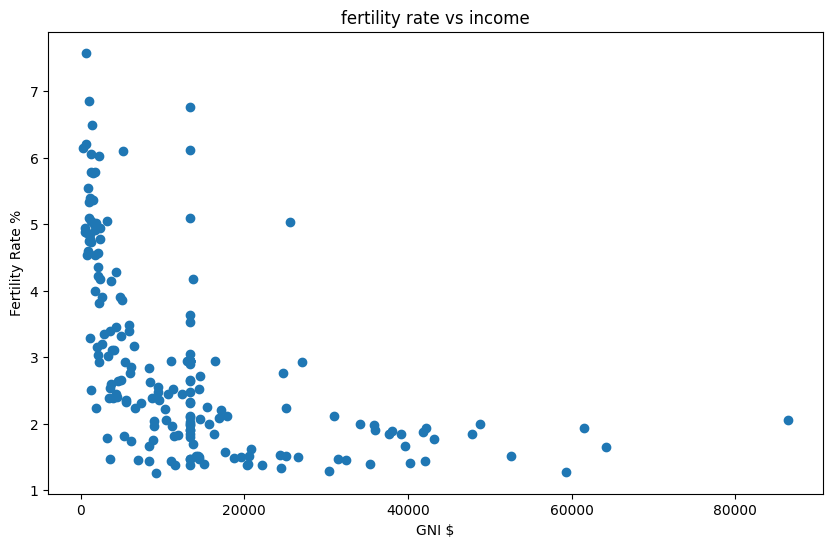

In [47]:
 fertility = health_and_demographics_df['FertilityRate']
 income = health_and_demographics_df['GNI']

 plt.figure(figsize=(10,6))
 plt.scatter(income,fertility)
 plt.xlabel('GNI $')
 plt.ylabel('Fertility Rate %')
 plt.title('fertility rate vs income')
 plt.show()

# List of Regions  names in ascending order: Literacy rates


In [48]:
literacy_rates_ascending_order = health_and_demographics_df.sort_values(by='LiteracyRate')
regional_literacy_ascending_order= literacy_rates_ascending_order['Region'].tolist()


print(literacy_rates_ascending_order)

          Country    Region  Population  Under15  Over60  FertilityRate  \
104          Mali    Africa       14854    47.14    4.29           6.85   
33           Chad    Africa       12448    48.52    3.80           6.49   
70         Guinea    Africa       11451    42.46    5.03           5.09   
153  Sierra Leone    Africa        5979    41.74    4.41           4.86   
18          Benin    Africa       10051    42.95    4.54           5.01   
..            ...       ...         ...      ...     ...            ...   
87     Kazakhstan    Europe       16271    25.46   10.04           2.52   
156      Slovenia    Europe        2068    14.16   23.16           1.49   
57        Estonia    Europe        1291    15.69   23.92           1.62   
93         Latvia    Europe        2060    14.57   24.24           1.57   
43           Cuba  Americas       11271    16.58   17.95           1.46   

     LifeExpectancy  ChildMortality  CellularSubscribers  LiteracyRate  \
104              51      

#List of Regions in ascending order: Low child mortality Rate


In [49]:

mortality_rate_ascending_order = health_and_demographics_df.sort_values(by='ChildMortality')
regional_child_mortality_ascending_order = mortality_rate_ascending_order['Region'].tolist()


print(regional_child_mortality_ascending_order)

['Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Western Pacific', 'Western Pacific', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Western Pacific', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Western Pacific', 'Europe', 'Europe', 'Americas', 'Europe', 'Americas', 'Western Pacific', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Americas', 'Americas', 'Eastern Mediterranean', 'Europe', 'Europe', 'Western Pacific', 'Eastern Mediterranean', 'Western Pacific', 'Eastern Mediterranean', 'Europe', 'Americas', 'Americas', 'Eastern Mediterranean', 'South-East Asia', 'Eastern Mediterranean', 'Americas', 'Americas', 'Europe', 'South-East Asia', 'Western Pacific', 'Europe', 'Eastern Mediterranean', 'Eastern Mediterranean', 'Europe', 'Europe', 'Americas', 'Western Pacific', 'Africa', 'South-East Asia', 'Americas', 'Western Pacific', 'Europe', 'Americas', 'Amer

# Box and whisker plot for the life expectancy across different regions

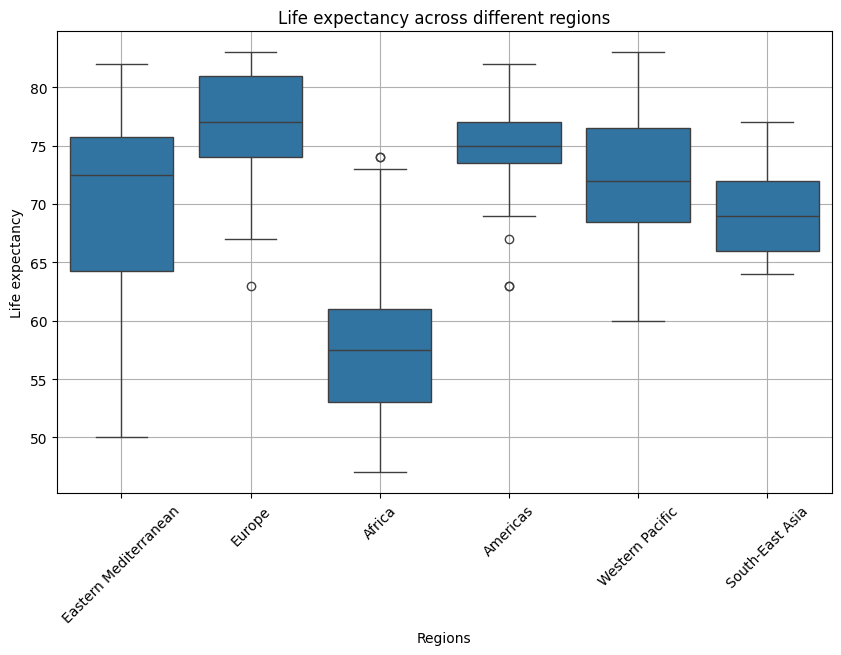

I can conclude that life expectancy is the lowest in the African region.


In [50]:

plt.figure(figsize=(10,6))
sns.boxplot(x = 'Region', y = 'LifeExpectancy',data = health_and_demographics_df)
plt.title('Life expectancy across different regions')
plt.xlabel('Regions')
plt.ylabel('Life expectancy')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

print('I can conclude that life expectancy is the lowest in the African region.')

# Graphs: life expectancy vs. wealth across different regions and wealths vs. fertility across different regions.

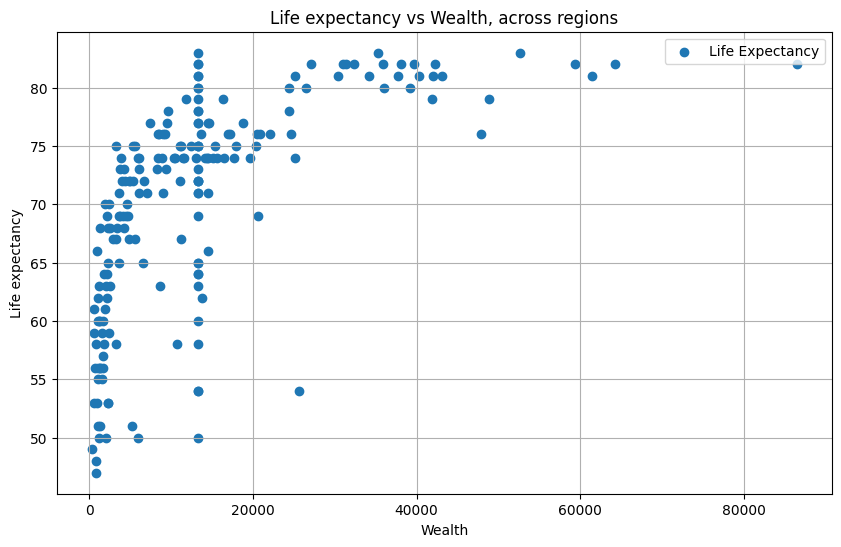

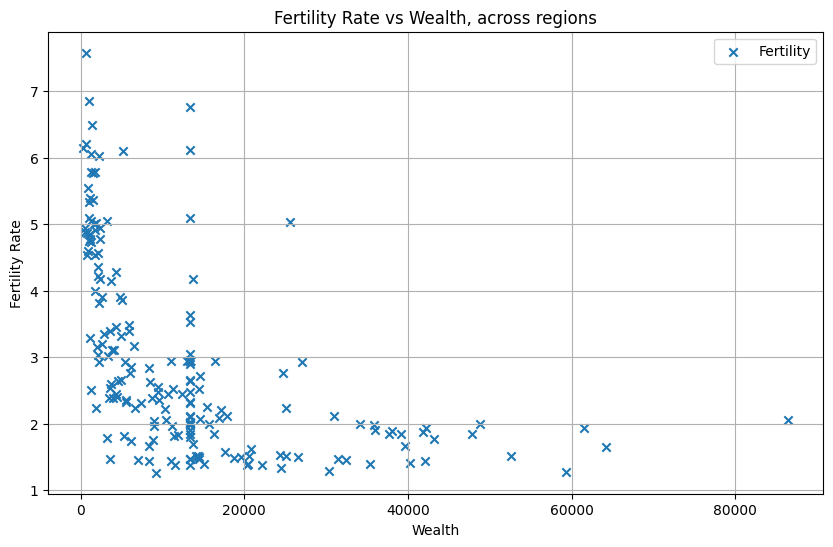

In [51]:
 life_expectancy = health_and_demographics_df['LifeExpectancy']
 income = health_and_demographics_df['GNI']
 fertility =health_and_demographics_df['FertilityRate']


 plt.figure(figsize=(10,6))
 plt.scatter(income,life_expectancy, marker= 'o', label= 'Life Expectancy')
 plt.title('Life expectancy vs Wealth, across regions')
 plt.xlabel('Wealth')
 plt.ylabel('Life expectancy')
 plt.legend()
 plt.grid(True)
 plt.show()


 plt.figure(figsize=(10,6))
 plt.scatter(income,fertility, marker= 'x', label= 'Fertility')
 plt.title('Fertility Rate vs Wealth, across regions')
 plt.xlabel('Wealth')
 plt.ylabel('Fertility Rate')
 plt.legend()
 plt.grid(True)
 plt.show()

#graphs: literacy vs. life expectancy by region, African countries.
 What can be concluded from the graphs?
 How confident can we be in the relationships represented here?

 We can conclude with both Regions and countries that the relationship between the literacy rate and life expectancy is directly proportional. This means that, the higher the literacy rate, the higher the life expectancy.

 We can be confident that the data is quite accurate as the are no outliers and the and the trend is solid.

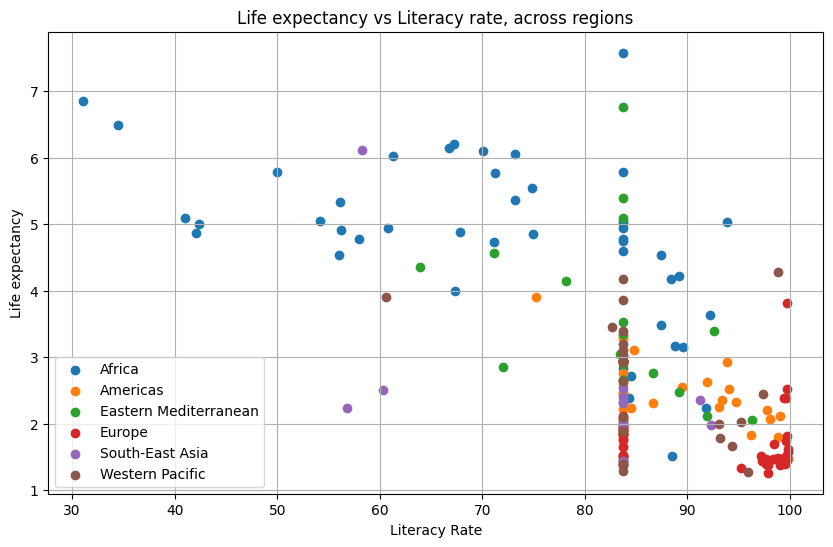

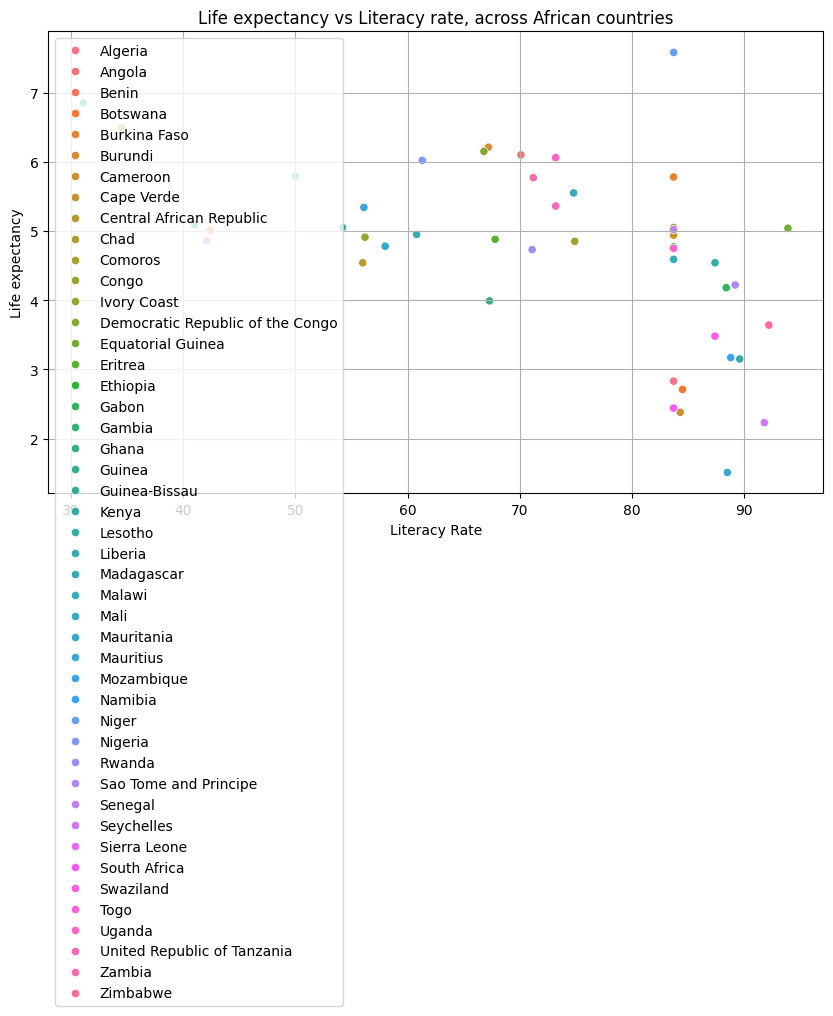

In [ ]:
 life_expectancy = health_and_demographics_df['LifeExpectancy']
 literacy = health_and_demographics_df['LiteracyRate']
 regions = health_and_demographics_df.groupby('Region')
 countries = health_and_demographics_df[health_and_demographics_df['Region'] == 'Africa']


plt.figure(figsize=(10,6))
for region, group in regions:
    plt.scatter(group['LiteracyRate'], group['FertilityRate'], label=region)
plt.title('Life expectancy vs Literacy rate, across regions')
plt.xlabel('Literacy Rate')
plt.ylabel('Life expectancy')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10,6))
sns.scatterplot(data=countries, x='LiteracyRate', y='FertilityRate', hue='Country')
plt.title('Life expectancy vs Literacy rate, across African countries')
plt.xlabel('Literacy Rate')
plt.ylabel('Life expectancy')
plt.legend()
plt.grid(True)
plt.show()

#Conclusion

Through this EDA, we have gained valuable insights into various demographic trends and health indicators across different regions and countries. By addressing missing values and conducting thorough data cleaning and processing, we ensured the reliability and accuracy of our analysis. The findings from this analysis can inform public health policies and interventions aimed at improving health outcomes and addressing disparities in access to healthcare and education.